In [1]:
from torchvision import datasets
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
data_path = "../dataset/cifar10/"
import csv
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from collections import OrderedDict
from torchvision import transforms
torch.set_printoptions(edgeitems =2, linewidth =75)

In [ ]:

cifar10=datasets.CIFAR10(data_path, train=True, download=False)
cifar10_val = datasets.CIFAR10(data_path,train=False, download=False)

In [ ]:
class_names =['airplane', 'automobile', 'bird','cat', 'deer', 'dog','frog', 'horse', 'ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes=10
for i in range(num_classes):
    ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label==i)
    plt.imshow(img)

In [ ]:
img, label = cifar10[99]
img, label, class_names[label]
plt.imshow(img)

In [ ]:
dir(transforms)
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
img_t,_ = tensor_cifar10[99]
print(type(img_t))
print(img_t.shape, img_t.dtype)
print(img_t.min(), img_t.max())

In [ ]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

In [ ]:
means=imgs.view(3,-1).mean(dim=1)
stds = imgs.view(3,-1).std(dim=1)
print(means, stds) 
print(transforms.Normalize(means, stds))

In [2]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470,0.2435, 0.2616))])
)
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470,0.2435, 0.2616))])
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


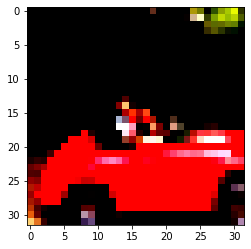

In [3]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1,2,0))
plt.show()